In [262]:
import cv2
import numpy as np
import pandas as pd
import datetime as dt
import time
import mysql.connector

In [404]:
class DB_access():
    username = ""
    password = ""
    weight = 0
    destination = 0
    

    login_success = 0
    local = None
    history_df = None
    today_ex_list = []

    mul = 0
    
    def __init__(self):

        try:
            self.local = mysql.connector.connect(
                host = "localhost",
                port = 3306,
                user = "root",
                password = "!@#!@#",
                database = "ex"
                )
            
            self.cursor = self.local.cursor(buffered=True)
        except:
            print("데이터 베이스 읽기 오류입니다.")
        
    def login(self):
        username = input("ID >>")
        password = input("PW >>")
        try:
            self.username = username
            self.password = password

            sql = "select * from userinfo where user = '" + self.username + "';"
                    #sql = "select * from userinfo;"
            self.cursor.execute(sql)

            result = self.cursor.fetchall()
            string = str(result).split(",")[1]
            string = string.replace("'", "")
            string = string.replace(" ", "")

            if string == password:
                print("로그인 성공")
                self.login_success = 1

            else:
                print("비밀번호 오류")
      
        except:
            print("그런 사람 없어요.")
        
    def register(self):
        #create table userinfo( user varchar(50), password varchar(50), weight int, destination int );
        self.username = input("ID >>")
        self.password = input("PW >>")
        self.weight = input("weight >>")
        self.destination = input("destiny >>")
        
        sql = "select * from userinfo where user = '" + self.username + "';"
        self.cursor.execute(sql)
        result = self.cursor.fetchall()
        
        try:
          if str(result) == "[]":
            time.sleep(1)
            sql = "insert into userinfo values('" + self.username + "', '"  + self.password + "', " + self.weight + ", " + self.destination + ");"
            self.cursor.execute(sql)
            self.local.commit()
            print("등록완료")
            sql = "insert into history values('" + self.username + "', 0, '" + self.return_today() + "', 0, '" + self.weight + "', '" + self.destination + "', 0, 0, 0, 0, 0);"
            time.sleep(1)
            self.cursor.execute(sql)
            self.local.commit()
            print("데이터 등록 완료")
          
          else:
              print("이미 존재하는 유저입니다.")
    
        except:
          print("알수없는 이유로 실패했습니다.")
            
    def see_ex_history(self):
        if self.login_success == 0:
            print("로그인을 먼저 진행하세요")
            return
        else:
            sql = "select * from history where user = '" + self.username + "';"
            self.cursor.execute(sql)
            result = self.cursor.fetchall()
            self.history_df = pd.DataFrame(result)
            self.history_df.columns = ['user', 'reward', 'day', 'cal', 'weight', 'destination', 'squrt', 'lunge', 'pushup', 'plank', "exday"]

    
    def insert_data(self, complete_ex_list):

      if complete_ex_list == self.today_ex_list:
        self.mul += 1

      cal = float(complete_ex_list[1]) * 0.5 + float(complete_ex_list[3]) * 0.5  + float(complete_ex_list[5]) * 0.5 + float(complete_ex_list[7]) * 0.33
      reward = int(cal)

      sql = "insert into history values('" + self.username + "', " + str(reward) + " , '" + self.return_today() + "', " + str(cal) + " , " + str(self.weight) + ", " + str(self.destination) + ", " + str(complete_ex_list[1]) + " , "  + str(complete_ex_list[3]) + " , " +  str(complete_ex_list[5]) + " , " + str(complete_ex_list[7]) + " , " + str(self.mul) + ");"
      self.cursor.execute(sql)
      self.local.commit()
      print("데이터 등록 완료")
        
    def return_today(self):
      year = dt.datetime.now().year
      month = dt.datetime.now().month
      day = dt.datetime.now().day

      return str(year) + "-"  + str(month) + "-" + str(day)
      
    def return_today_ex(self):
      self.weight = self.history_df["weight"][len(self.history_df)-1]
      self.destination = self.history_df["destination"][len(self.history_df)-1]


      if self.history_df["exday"][len(self.history_df)-1] % 2 == 0:
        self.mul = int(self.history_df["exday"][len(self.history_df)-1])
        if self.mul > 6:
          self.mul = 6

        self.today_ex_list.append("squat")
        self.today_ex_list.append(str(30 + self.mul*5))
        
        self.today_ex_list.append("pushup")
        self.today_ex_list.append(str(20 + self.mul*5))

        self.today_ex_list.append("lunge")
        self.today_ex_list.append(str(30 + self.mul*5))
        
        self.today_ex_list.append("plank")
        self.today_ex_list.append(str(60 + self.mul*5))
        

        
        
    def run(self):
        while(True):
            sel = input("Login > 1 / regist > 2 / exit > 3 \n >>>>>")
            if sel == "1":
                self.login()
            elif sel == "2":
                self.register()
            elif sel == "3":
                break
                
            if self.login_success == 1:
                time.sleep(1)
                print("로그인 성공 메인메뉴로 이동")
                break
        self.see_ex_history()
        print("운동 정보를 가져오고 있습니다.")
        time.sleep(1)

        self.return_today_ex()
        print("오늘의 운동량을 가져옵니다.")
        time.sleep(1)

In [ ]:
DB = DB_access()
DB.run()

In [367]:
complete_ex_list = ["squat", 60, "lunge", 40, "pushup", 45, "plank", 60]

DB.insert_data(complete_ex_list)

데이터 등록 완료


In [362]:
DB.history_df = DB.history_df.drop(0, axis=0)

In [369]:
DB.history_df

,user,reward,day,cal,weight,destination,squat,lunge,pushup,plank,exday
0,son,0,2023-01-26,0.00,68,70,0,0,0,0,0
1,son,44,2023-01-26,44.90,68,70,30,20,20,30,0
2,son,49,2023-01-26,49.70,68,70,31,20,22,40,0
3,son,39,2023-01-26,39.70,68,70,31,0,22,40,0
4,son,52,2023-01-26,52.35,68,70,32,21,22,45,0
5,son,53,2023-01-26,53.85,68,70,35,20,23,45,0
6,son,52,2023-01-26,52.85,68,70,35,21,20,45,0
7,son,41,2023-01-26,41.00,68,70,37,25,20,0,0
8,son,59,2023-01-26,59.50,68,70,37,26,23,50,0
9,son,64,2023-01-26,64.00,68,70,40,30,25,50,0


In [370]:
DB.history_df = DB.history_df.rename(columns={'squrt':'squat'})
DB.history_df

,user,reward,day,cal,weight,destination,squat,lunge,pushup,plank,exday
0,son,0,2023-01-26,0.00,68,70,0,0,0,0,0
1,son,44,2023-01-26,44.90,68,70,30,20,20,30,0
2,son,49,2023-01-26,49.70,68,70,31,20,22,40,0
3,son,39,2023-01-26,39.70,68,70,31,0,22,40,0
4,son,52,2023-01-26,52.35,68,70,32,21,22,45,0
5,son,53,2023-01-26,53.85,68,70,35,20,23,45,0
6,son,52,2023-01-26,52.85,68,70,35,21,20,45,0
7,son,41,2023-01-26,41.00,68,70,37,25,20,0,0
8,son,59,2023-01-26,59.50,68,70,37,26,23,50,0
9,son,64,2023-01-26,64.00,68,70,40,30,25,50,0


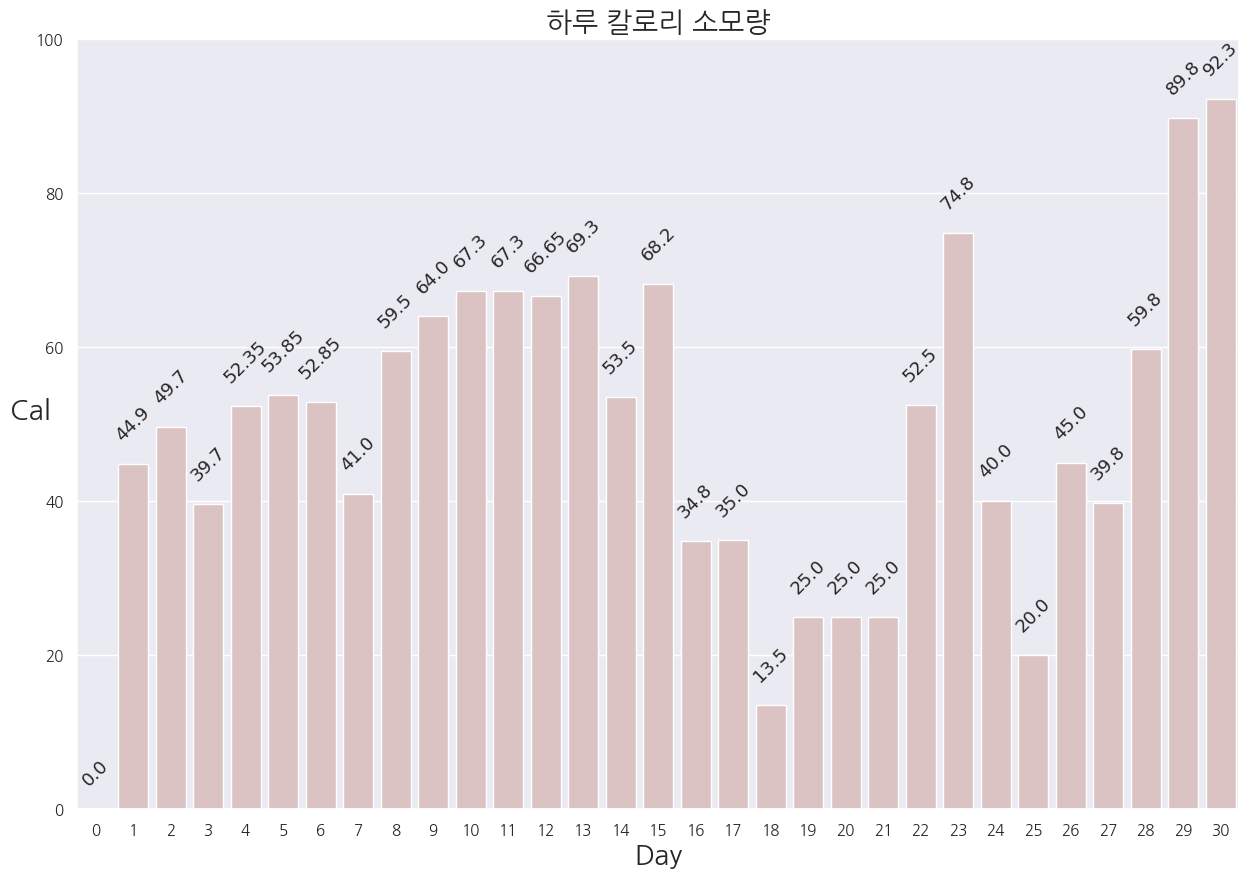

In [390]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
[(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)


ax = sns.barplot(data=DB.history_df, x=DB.history_df.index, y='cal', color='#DEBFBE')#palette = "ch:s=.25,rot=-.25"
sns.set(rc = {'figure.figsize':(15,10)})

plt.title('하루 칼로리 소모량', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Cal', fontsize=20, rotation=0)
plt.ylim(0,100)
plt.grid(visible=True, axis='y')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 13, rotation=45)
    
# plt.rc('font', size=40)        # 기본 폰트 크기

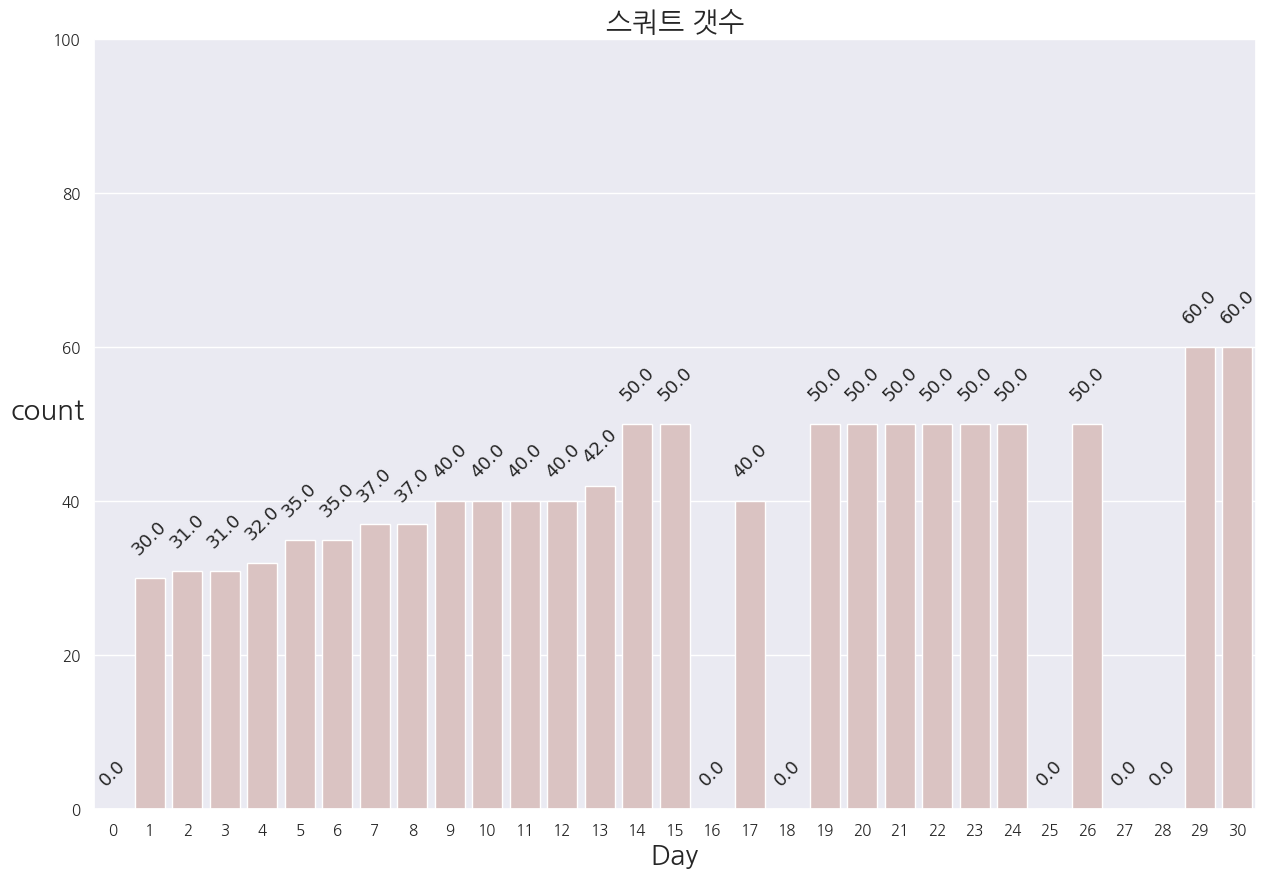

In [389]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
[(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)


ax = sns.barplot(data=DB.history_df, x=DB.history_df.index, y='squat', color='#DEBFBE')#palette = "ch:s=.25,rot=-.25"
sns.set(rc = {'figure.figsize':(15,10)})
plt.grid(visible=True, axis='y')
plt.title('스쿼트 갯수', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('count', fontsize=20, rotation=0)
plt.ylim(0,100)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 13, rotation=45)
    


In [373]:
DB.history_df['squat']

0      0
1     30
2     31
3     31
4     32
5     35
6     35
7     37
8     37
9     40
10    40
11    40
12    40
13    42
14    50
15    50
16     0
17    40
18     0
19    50
20    50
21    50
22    50
23    50
24    50
25     0
26    50
27     0
28     0
29    60
30    60
Name: squat, dtype: int64

In [374]:
len(DB.history_df)

31

In [376]:
squat = DB.history_df['squat']
count_squat = 0
count_lunge = 0
count_pushup = 0
count_plank = 0

for i in range(len(DB.history_df)):
    squat = DB.history_df.iloc[i, 6]
    lunge = DB.history_df.iloc[i, 7]
    pushup = DB.history_df.iloc[i, 8]
    plank = DB.history_df.iloc[i, 9]
    
    if squat != 0:
        count_squat += 1
    if lunge != 0:
        count_lunge += 1
    if pushup != 0:
        count_pushup += 1
    if plank != 0:
        count_plank += 1

        
print(count_squat, count_lunge, count_pushup, count_plank)
    

25 20 26 19


In [377]:
type(count_squat)

int

In [378]:
x = [count_squat, count_lunge, count_pushup, count_plank]
count_sum = sum(x)
count_squat_per = (count_squat / count_sum) * 100
count_squat_per

27.77777777777778

In [379]:
x = [count_squat, count_lunge, count_pushup, count_plank]
count_sum = sum(x)
count_lunge_per = (count_lunge / count_sum) * 100
count_lunge_per

22.22222222222222

In [380]:
x = [count_squat, count_lunge, count_pushup, count_plank]
count_sum = sum(x)
count_pushup_per = (count_pushup / count_sum) * 100
count_pushup_per

28.888888888888886

In [381]:
x = [count_squat, count_lunge, count_pushup, count_plank]
count_sum = sum(x)
count_plank_per = (count_plank / count_sum) * 100
count_plank_per

21.11111111111111

In [392]:
hab = count_squat_per + count_lunge_per + count_pushup_per + count_plank_per
hab

100.0

In [393]:
count_list = ['count_squat', 'count_lunge', 'count_pushup', 'count_plank']
count = [count_squat, count_lunge, count_pushup, count_plank]
count_dict = {'count_squat':[count_squat], 'count_lunge':[count_lunge], 'count_pushup':[count_pushup], 'count_plank':[count_plank]}
df_count = pd.DataFrame(count_dict)
df_count

,count_squat,count_lunge,count_pushup,count_plank
0,25,20,26,19


In [394]:
count_list, count

(['count_squat', 'count_lunge', 'count_pushup', 'count_plank'],
 [25, 20, 26, 19])

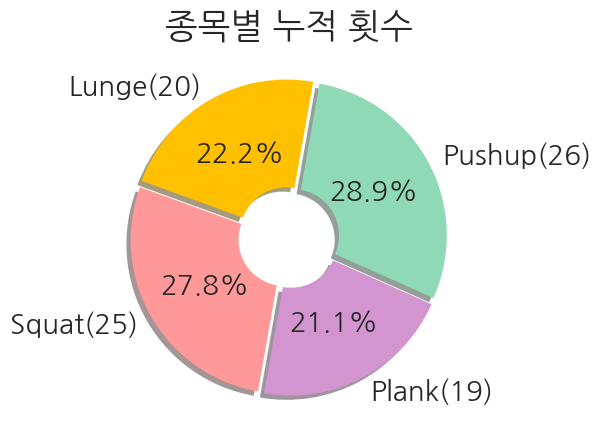

In [403]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
[(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

ratio = [count_squat_per, count_lunge_per, count_pushup_per, count_plank_per]
labels = ['Squat('+str(count_squat)+')', 'Lunge('+str(count_lunge)+')', 'Pushup('+str(count_pushup)+')', 'Plank('+str(count_plank)+')']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 0}
explode = [0.03, 0.03, 0.03, 0.03]

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, shadow=True, wedgeprops=wedgeprops, explode=explode, textprops={'size': 20})
sns.set(rc = {'figure.figsize':(5,3)})
plt.title('종목별 누적 횟수', fontsize = 25)
plt.show()